<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.659274,58.170081,99.606676,0.000203,260.436234,260.436069,0.000165
1,0.0,1.0,83.061564,67.406097,60.405285,-0.000100,220.872845,220.872946,-0.000101
2,0.0,2.0,95.968108,91.707345,91.419509,0.000020,289.094981,289.094965,0.000016
3,0.0,3.0,61.084088,28.075604,48.603887,0.000632,147.764211,147.763619,0.000592
4,0.0,4.0,86.826714,51.197526,87.140323,0.000016,235.164578,235.164599,-0.000020
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,53.730128,65.483145,29.848571,0.000060,159.061903,159.061933,-0.000030
249996,999.0,246.0,88.172912,24.982171,72.150710,-0.000836,195.304957,195.305547,-0.000590
249997,999.0,247.0,76.438261,52.456337,83.019213,0.000481,221.914293,221.913609,0.000683
249998,999.0,248.0,27.683174,27.730676,45.578465,0.000308,110.992622,110.992268,0.000353


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.659274  58.170081  99.606676  ...  260.436234  260.436069  0.000165
      1.0    83.061564  67.406097  60.405285  ...  220.872845  220.872946 -0.000101
      2.0    95.968108  91.707345  91.419509  ...  289.094981  289.094965  0.000016
      3.0    61.084088  28.075604  48.603887  ...  147.764211  147.763619  0.000592
      4.0    86.826714  51.197526  87.140323  ...  235.164578  235.164599 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  53.730128  65.483145  29.848571  ...  159.061903  159.061933 -0.000030
      246.0  88.172912  24.982171  72.150710  ...  195.304957  195.305547 -0.000590
      247.0  76.438261  52.456337  83.019213  ...  221.914293  221.913609  0.000683
      248.0  27.683174  27.730676  45.578465  ...  110.992622  110.992268  0.000353
      249.0  24.539447  22.988745  84.031401  ...  141.557793  141.559375 -0.001582

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.659274  58.170081  99.606676  ...  260.436234  260.436069  0.000165
      1.0    83.061564  67.406097  60.405285  ...  220.872845  220.872946 -0.000101
      2.0    95.968108  91.707345  91.419509  ...  289.094981  289.094965  0.000016
      3.0    61.084088  28.075604  48.603887  ...  147.764211  147.763619  0.000592
      4.0    86.826714  51.197526  87.140323  ...  235.164578  235.164599 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  53.730128  65.483145  29.848571  ...  159.061903  159.061933 -0.000030
      246.0  88.172912  24.982171  72.150710  ...  195.304957  195.305547 -0.000590
      247.0  76.438261  52.456337  83.019213  ...  221.914293  221.913609  0.000683
      248.0  27.683174  27.730676  45.578465  ...  110.992622  110.992268  0.000353
      249.0  24.539447  22.988745  84.031401  ...  141.557793  141.559375 -0.001582

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.659274,58.170081,99.606676,0.000203,260.436234,260.436069,0.000165
1,0.0,1.0,83.061564,67.406097,60.405285,-0.000100,220.872845,220.872946,-0.000101
2,0.0,2.0,95.968108,91.707345,91.419509,0.000020,289.094981,289.094965,0.000016
3,0.0,3.0,61.084088,28.075604,48.603887,0.000632,147.764211,147.763619,0.000592
4,0.0,4.0,86.826714,51.197526,87.140323,0.000016,235.164578,235.164599,-0.000020
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,53.730128,65.483145,29.848571,0.000060,159.061903,159.061933,-0.000030
249996,999.0,246.0,88.172912,24.982171,72.150710,-0.000836,195.304957,195.305547,-0.000590
249997,999.0,247.0,76.438261,52.456337,83.019213,0.000481,221.914293,221.913609,0.000683
249998,999.0,248.0,27.683174,27.730676,45.578465,0.000308,110.992622,110.992268,0.000353


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    92.659274  58.170081  99.606676  ...  260.436234  260.436069  0.000165
      1.0    83.061564  67.406097  60.405285  ...  220.872845  220.872946 -0.000101
      2.0    95.968108  91.707345  91.419509  ...  289.094981  289.094965  0.000016
      3.0    61.084088  28.075604  48.603887  ...  147.764211  147.763619  0.000592
      4.0    86.826714  51.197526  87.140323  ...  235.164578  235.164599 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  53.730128  65.483145  29.848571  ...  159.061903  159.061933 -0.000030
      246.0  88.172912  24.982171  72.150710  ...  195.304957  195.305547 -0.000590
      247.0  76.438261  52.456337  83.019213  ...  221.914293  221.913609  0.000683
      248.0  27.683174  27.730676  45.578465  ...  110.992622  110.992268  0.000353
      249.0  24.539447  22.988745  84.031401  ...  141.557793  141.559375 -0.001582

[250000 rows x 7 columns]

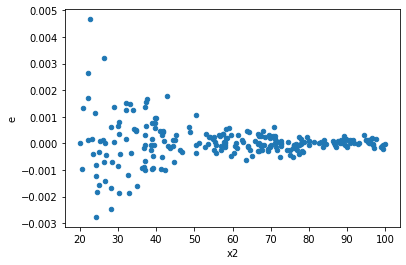

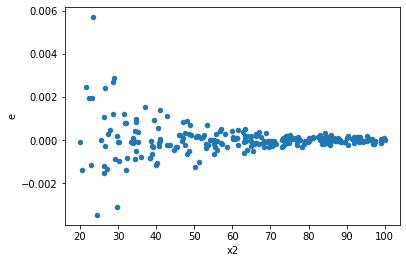

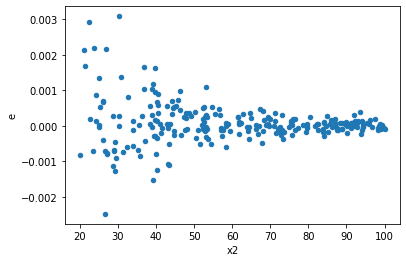

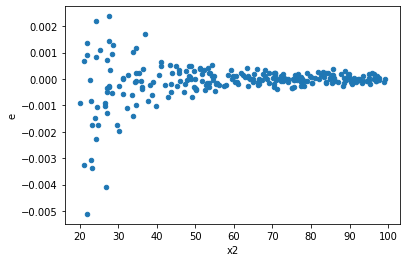

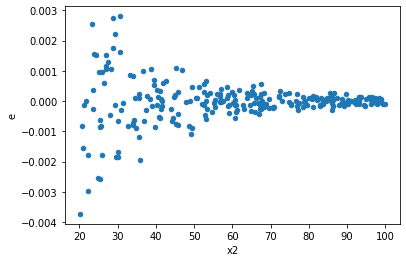

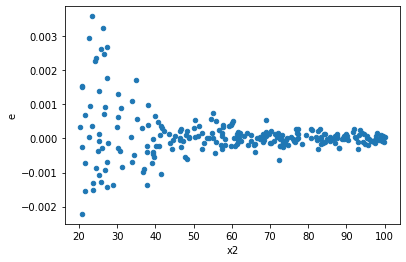

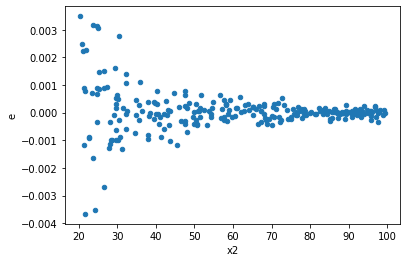

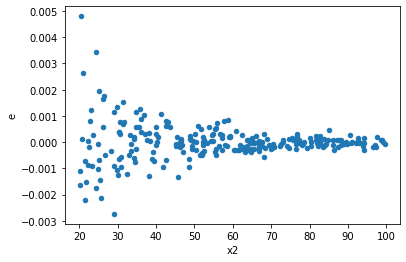

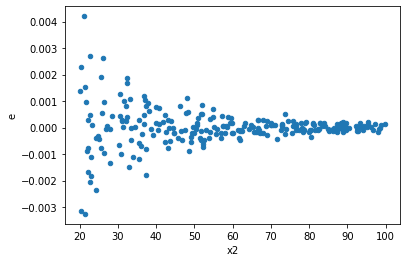

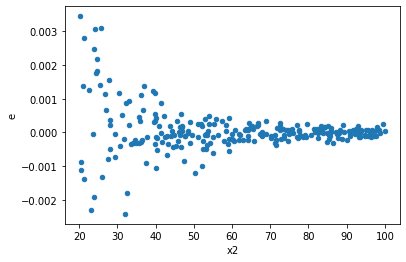

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,110.0,134.0,3.538944952584972e-05,8.727766213325843e-05,3.217222684168156e-07,6.513258368153615e-07,2.024497216249636,0.00010474743154853527,0.9999476262842257,5.237371577426764e-05,Reject001=0 : Heteroscedasticity
1.0,132.0,112.0,5.784194118634e-05,7.624077136188375e-05,4.3819652413893943e-07,6.807211728739621e-07,1.5534609139394384,0.01681674542484779,0.9915916272875761,0.008408372712423895,Reject001=1 : Homoscedasticity
2.0,125.0,119.0,1.9810852048814847e-05,6.502111475650997e-05,1.5848681639051877e-07,5.463959223236132e-07,3.4475796458505963,4.4928061271320985e-11,0.999999999977536,2.2464030635660492e-11,Reject001=0 : Heteroscedasticity
3.0,123.0,121.0,6.200465624036736e-05,7.145719366191569e-05,5.041028962631492e-07,5.905553195199644e-07,1.1714975730107406,0.38365040209003065,0.8081747989549847,0.19182520104501533,Reject001=1 : Homoscedasticity
4.0,123.0,121.0,5.6305976214161656e-05,7.609312492348252e-05,4.577721643427777e-07,6.288688010205167e-07,1.373759372030368,0.08095208492896955,0.9595239575355152,0.040476042464484774,Reject001=1 : Homoscedasticity
6.0,130.0,114.0,4.562339715534966e-06,0.00013765287832659547,3.509492088873051e-08,1.207481388829785e-06,34.406157878461684,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
9.0,120.0,124.0,3.204418443502424e-06,0.00010466594106719173,2.6703487029186863e-08,8.440801698967075e-07,31.609361315776077,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
12.0,136.0,108.0,4.556497057532175e-05,6.331158184499905e-05,3.350365483479541e-07,5.862183504166579e-07,1.7497146305597608,0.0026558498881492643,0.9986720750559254,0.0013279249440746321,Reject001=0 : Heteroscedasticity
14.0,119.0,125.0,5.8359869972713106e-05,7.144767091758292e-05,4.904190754009505e-07,5.715813673406633e-07,1.16549578923568,0.3978893206607388,0.8010553396696306,0.1989446603303694,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,110.0,134.0,3.538944952584972e-05,8.727766213325843e-05,3.217222684168156e-07,6.513258368153615e-07,2.024497216249636,0.00010474743154853527,Reject001=0 : Heteroscedasticity
1.0,132.0,112.0,5.784194118634e-05,7.624077136188375e-05,4.3819652413893943e-07,6.807211728739621e-07,1.5534609139394384,0.01681674542484779,Reject001=1 : Homoscedasticity
2.0,125.0,119.0,1.9810852048814847e-05,6.502111475650997e-05,1.5848681639051877e-07,5.463959223236132e-07,3.4475796458505963,4.4928061271320985e-11,Reject001=0 : Heteroscedasticity
3.0,123.0,121.0,6.200465624036736e-05,7.145719366191569e-05,5.041028962631492e-07,5.905553195199644e-07,1.1714975730107406,0.38365040209003065,Reject001=1 : Homoscedasticity
4.0,123.0,121.0,5.6305976214161656e-05,7.609312492348252e-05,4.577721643427777e-07,6.288688010205167e-07,1.373759372030368,0.08095208492896955,Reject001=1 : Homoscedasticity
5.0,109.0,135.0,0.00011129574373812661,4.427681609067428e-06,1.021061869157125e-06,3.2797641548647614e-08,0.03212111091340792,3.576331169380179e-53,Reject001=0 : Heteroscedasticity
6.0,130.0,114.0,4.562339715534966e-06,0.00013765287832659547,3.509492088873051e-08,1.207481388829785e-06,34.406157878461684,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,128.0,116.0,8.100285216041253e-05,4.128695875493094e-05,6.328347825032229e-07,3.559220582321633e-07,0.5624249299703287,0.0015552715320267631,Reject001=0 : Heteroscedasticity
8.0,109.0,135.0,7.448296588415649e-05,4.805303967750037e-05,6.833299622399679e-07,3.559484420555583e-07,0.5209027288789634,0.00046986328356148457,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    647
Reject001=1 : Homoscedasticity      353
Name: Result_test, dtype: int64